# <center>**Graded Challenge 1**</center>

* *Name* : Alexander Prasetyo Christianto
* *Age* : 23
* *Last Education Background* : *Electrical Engineering*
* *Occupation* : *Full Time Data Science Student Batch-001*


## Description

### Objective

This task is the first assessment task given by Hacktiv8. This task is a task that aims to explore data from the Google BigQuery Public Dataset. In this task, the dataset is retrieved from the 'summary' table in the covid19_jhu_csse_eu database.

In this assignment, I will discuss about the covid that occurred in Russia. Data exploration will be adjusted based on the assessment rubric provided by Hacktiv8. The assessment rubric will assess data retrieval, data loading, missing value handling, columns manipulation, data query, grouping and aggregating, pandas visualization, whether all code can run without errors.

### Problem Statement

Russia is one of the countries with the 9th most populous population. As the 9th most populous population country, finding the the province with the highest confirmed and death covid cases, also average covid cases per province will help the goverment to distribute the vaccine or medical personnels.

In this assignment, we will try to analyze the given data to find the highest confirmed and death covid cases per province and average covid cases per province in Russia.

## Working Station

### SQL Query For the Dataset

SELECT province_state, country_region, date, latitude, longitude, location_geom, confirmed, deaths, active FROM `bigquery-public-data.covid19_jhu_csse_eu.summary`
WHERE country_region = "Russia"

### Libraries Used

In this assignment, we are going to use just 2 libraries, namely pandas and matplotlib.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Data Loading and Dataset Preview

SELECT province_state, country_region, date, latitude, longitude, location_geom, confirmed, deaths, active FROM `bigquery-public-data.covid19_jhu_csse_eu.summary`
WHERE country_region = "Russia"

Next step is, we load the data and set it into a new data frame named 'df'.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexanderprasetyo/h8-learning-journey/graded_challenge/h8dsft_P0GC1_Alexander_Prasetyo_C.csv')

After we load the data, we must check whether the data is loaded without any error by using the .head() and .tail() command. This is the preview of first 5 rows from the dataset.

In [3]:
df.head()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,active
0,Altai Krai,Russia,2022-01-31,52.693224,82.693142,POINT(82.6931424 52.6932243),132806,7348.0,NaN
1,Bryansk Oblast,Russia,2022-01-31,52.887332,33.415853,POINT(33.415853 52.8873315),104377,3249.0,NaN
2,Buryatia Republic,Russia,2022-01-31,52.718243,109.492143,POINT(109.492143 52.7182426),86668,2605.0,NaN
3,Irkutsk Oblast,Russia,2022-01-31,56.637012,104.719221,POINT(104.719221 56.6370122),170417,7423.0,NaN
4,Kabardino-Balkarian Republic,Russia,2022-01-31,43.480605,43.597898,POINT(43.5978976 43.4806048),45423,1577.0,NaN


In [4]:
df.tail()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,active
66848,Tatarstan Republic,Russia,2021-11-21,55.764857,52.431043,POINT(52.43104273 55.7648572),35794,1164.0,NaN
66849,Tatarstan Republic,Russia,2021-05-08,55.764857,52.431043,POINT(52.43104273 55.7648572),20738,471.0,2555.0
66850,Tatarstan Republic,Russia,2022-04-27,55.764857,52.431043,POINT(52.43104273 55.7648572),143971,1972.0,NaN
66851,Tatarstan Republic,Russia,2021-08-21,55.764857,52.431043,POINT(52.43104273 55.7648572),24978,664.0,NaN
66852,Tatarstan Republic,Russia,2022-03-10,55.764857,52.431043,POINT(52.43104273 55.7648572),128718,1772.0,NaN


### Data Cleaning

Now the data is loaded into our workspace. Before we begin exploration and the analysis, it is required to do an overview of the dataset and handle any kind of missing value that may interfere with the process of data exploration and analysis.

In [5]:
df.shape

(66853, 9)

The command above is used to get a tuple representing the dimensionality of the DataFrame. There are 66853 rows and 9 columns in our data frame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66853 entries, 0 to 66852
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province_state  66732 non-null  object 
 1   country_region  66853 non-null  object 
 2   date            66853 non-null  object 
 3   latitude        66823 non-null  float64
 4   longitude       66823 non-null  float64
 5   location_geom   66823 non-null  object 
 6   confirmed       66853 non-null  int64  
 7   deaths          66852 non-null  float64
 8   active          35761 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 4.6+ MB


The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values). Note: the info() method actually prints the info.

From the command above, we get information that there are rows with null values in the province_state and active columns. Therefore, we will do the missing value handling on these two columns.

To perform missing value handling, we will use the command below

In [7]:
df2 = df.drop(['active'], axis=1)

Because we have lots of null values in 'active' column, we will not be using the 'active' column for the data analysis and exploration. Then we save the result into a new variable named 'df2'.

In [8]:
df2.shape

(66853, 8)

We made a new variable called 'df2' so it is better to check shape of the data frame and we now know that there are 66853 rows and 8 columns.

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66853 entries, 0 to 66852
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province_state  66732 non-null  object 
 1   country_region  66853 non-null  object 
 2   date            66853 non-null  object 
 3   latitude        66823 non-null  float64
 4   longitude       66823 non-null  float64
 5   location_geom   66823 non-null  object 
 6   confirmed       66853 non-null  int64  
 7   deaths          66852 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 4.1+ MB


As we can see by using the command above, the 'active' column has been dropped.

In [10]:
df3 = df2.dropna(axis=0)

The command above is used for dropping any row that contains null value from variable 'df2'. Then we assign the result into a new variable called 'df3'.

Next step is to rename our columns into our fitting taste. Personally, I like my column names start with capital alphabet. So, the code below is renaming the columns in variable 'df3'.

In [11]:
df3.rename(
    columns = {
        'province_state': 'Province',
        'country_region':'Country',
        'date': 'Date',
        'latitude': 'Latitude',
        'longitude': 'Longitude',
        'location_geom': 'Location_Pinpoint',
        'confirmed': 'Confirmed_Cases',
        'deaths': 'Death_Cases'
    }, inplace = True
)

C:\Users\alexa\AppData\Local\Temp\ipykernel_19348\1230531004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.rename(


### Data Exploration

From now on, we will be using dataframe that is contained in variable 'df3' because we have handled any missing value from the previous dataframe in variable 'df'.

In [12]:
df3

,Province,Country,Date,Latitude,Longitude,Location_Pinpoint,Confirmed_Cases,Death_Cases
0,Altai Krai,Russia,2022-01-31,52.693224,82.693142,POINT(82.6931424 52.6932243),132806,7348.0
1,Bryansk Oblast,Russia,2022-01-31,52.887332,33.415853,POINT(33.415853 52.8873315),104377,3249.0
2,Buryatia Republic,Russia,2022-01-31,52.718243,109.492143,POINT(109.492143 52.7182426),86668,2605.0
3,Irkutsk Oblast,Russia,2022-01-31,56.637012,104.719221,POINT(104.719221 56.6370122),170417,7423.0
4,Kabardino-Balkarian Republic,Russia,2022-01-31,43.480605,43.597898,POINT(43.5978976 43.4806048),45423,1577.0
...,...,...,...,...,...,...,...,...
66848,Tatarstan Republic,Russia,2021-11-21,55.764857,52.431043,POINT(52.43104273 55.7648572),35794,1164.0
66849,Tatarstan Republic,Russia,2021-05-08,55.764857,52.431043,POINT(52.43104273 55.7648572),20738,471.0
66850,Tatarstan Republic,Russia,2022-04-27,55.764857,52.431043,POINT(52.43104273 55.7648572),143971,1972.0
66851,Tatarstan Republic,Russia,2021-08-21,55.764857,52.431043,POINT(52.43104273 55.7648572),24978,664.0


Here, we check again our df3 variable.

After we did the variable checking, we proceed to our data exploration. First, we group the data according to the province name and find the max value of confirmed cases for each province. And then we assign the grouping and aggregation value into a new variable named 'Max_Confirmed_Cases_Per_Province'

In [13]:
Max_Confirmed_Cases_Per_Provice = df3.groupby('Province')['Confirmed_Cases'].max().reset_index()

Then, we set a parameter to variable 'b' where the variable 'b' only contain of which province that has confirmed cases more than 450000 cases.

In [14]:
b = Max_Confirmed_Cases_Per_Provice[
    Max_Confirmed_Cases_Per_Provice["Confirmed_Cases"]>450000] \
        [["Province", "Confirmed_Cases"]].reset_index()

Plot the result into a bar chart where the X axis from the 'Province' column and the Y axis is from 'Confirmed_Cases' column.

<function matplotlib.pyplot.show(close=None, block=None)>

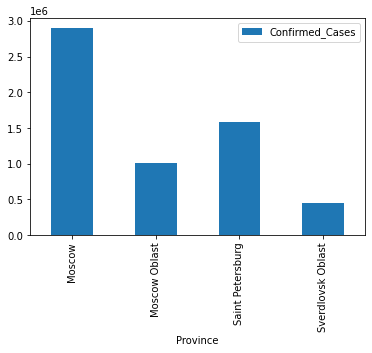

In [15]:
b.plot(x='Province', y='Confirmed_Cases', kind='bar')
plt.show

The chart shows that Moscow, Moscow Oblast, Saint Petersburg and Sverdlovsk Oblast are the top four of confirmed covid cases.

Next, to find which province in Russia that has the most death covid cases, we do a grouping again by each province and then find the max value of death cases from each province.

In [16]:
Max_Death_Cases_Per_Province = df3.groupby('Province')['Death_Cases'].max().reset_index()

In [17]:
Max_Death_Cases_Per_Province

,Province,Death_Cases
0,Adygea Republic,1004.0
1,Altai Krai,8706.0
2,Altai Republic,622.0
3,Amur Oblast,764.0
4,Arkhangelsk Oblast,1767.0
...,...,...
78,Vologda Oblast,3879.0
79,Voronezh Oblast,8365.0
80,Yamalo-Nenets Autonomous Okrug,1043.0
81,Yaroslavl Oblast,2830.0


In [18]:
d = Max_Death_Cases_Per_Province[
    Max_Death_Cases_Per_Province["Death_Cases"]>11000] \
        [["Province", "Death_Cases"]].reset_index()

Assign the grouping value into a new variable named 'd'

<function matplotlib.pyplot.show(close=None, block=None)>

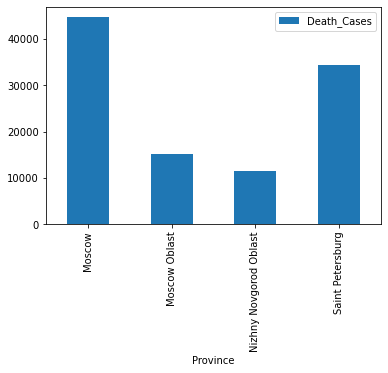

In [19]:
d.plot(x='Province', y='Death_Cases', kind='bar')
plt.show

From the bar chart above, we now know that Moscow, Saint Petersburg, Moscow Oblast, and Nizhny Novgorod Oblast are the top 4 provinces in death covid cases.

Now, we find the average death cases per province

In [20]:
Death_Cases_Per_Province = df3.groupby('Province')['Date','Death_Cases'].mean().reset_index()

C:\Users\alexa\AppData\Local\Temp\ipykernel_19348\1228349587.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Death_Cases_Per_Province = df3.groupby('Province')['Date','Death_Cases'].mean().reset_index()


Assign the new grouping into a new variable called variable 'f'.

In [21]:
f = Death_Cases_Per_Province[
    (Death_Cases_Per_Province["Death_Cases"] > 5500)][["Province","Death_Cases"]]

<function matplotlib.pyplot.show(close=None, block=None)>

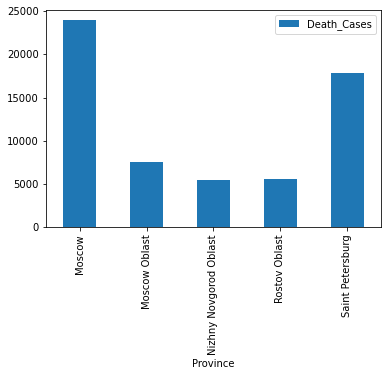

In [22]:
f.plot(x='Province', y='Death_Cases', kind='bar')
plt.show

### Conclusion

From the analysis that we have done in the Data Exploration section, the conclusions are mentioned below:

* Provinces with the highest confirmed covid cases are Moscow then followed by Moscow Oblast, Saint Petersburg and Sverdlovsk Oblast.
* Provinces with the highest death covid cases are Moscow then followed by Saint Petersburg, Moscow Oblast, and Nizhny Novgorod Oblast.
* Provinces with the highest average of death covid cases are Moscow followed by Saint Petersburg, Moscow Oblast, Rostov Oblast, Nizhny Novgorod Oblast.